1977.4830946666661


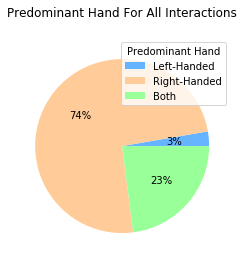

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
#Pandas configuration
pd.set_option("display.precision",3)
pd.set_option("display.expand_frame_repr", False)
pd.set_option("display.max_rows",25)

#reading in data
data = pd.read_csv("masterdata.txt",",")

#split by participant
#split by interaction
#calculate x,y,z difference in new column for each frame
#calculate relative energy for each interaction sqrt(x^2+y^2+z^2)

energy_left_df = data[data['Bone'] == "l_index_finger_tip_marker"]
energy_right_df = data[data['Bone'] == "r_index_finger_tip_marker"]

participants = 3
interactions = 25
            
def calc_energy(dataframe):
    energy = []
    dataframe = dataframe.groupby(["Participant","Interaction"])
    for j in range(1,interactions+1):
        for i in range(1,participants+1):
            new = dataframe.get_group((i,j))
            new.loc[:,'x_delta'] = new.X.diff().fillna(0)
            new.loc[:,'y_delta'] = new.Y.diff().fillna(0)
            new.loc[:,'z_delta'] = new.Z.diff().fillna(0)
            temp = math.sqrt((new['x_delta'].sum()**2)+(new['y_delta'].sum()**2)+(new['z_delta'].sum()**2))
            energy.append(temp)
    return energy

def calc_time(dataframe):
    average_time=0
    dataframe = dataframe.groupby(["Participant","Interaction"])
    for j in range(1,interactions+1):
        for i in range(1,participants+1):
            new = dataframe.get_group((i,j))
            average_time += new.iloc[-1, new.columns.get_loc("Time")]
    average_time = average_time/(participants*interactions)
    return average_time

avg_time = calc_time(data)
print(avg_time)
energy_left,energy_right = calc_energy(energy_left_df),calc_energy(energy_right_df)
barchart = [list(energy_left) for energy_left in zip(energy_left, energy_right)]
    
barchart = np.asarray(barchart)
barchart = barchart.reshape(25,6)

left,right,both=0,0,0

for i in range(0,len(energy_left)-1):
    if (energy_left[i])>(0.75*energy_right[i]) and (energy_right[i])>(0.75*energy_left[i]):
        both+=1
    elif (energy_left[i] > energy_right[i]):
        left+=1
    else:
        right+=1

y = np.array([left/75*100,right/75*100,both/75*100])
mylabels = ["Left-Handed", "Right-Handed", "Both"]
colors = ['#66b3ff','#ffcc99','#99ff99']
plt.pie(y, autopct='%1.0f%%',colors=colors)
plt.title('Predominant Hand For All Interactions\n')
plt.legend(title="Predominant Hand",labels=mylabels)
plt.savefig('predominanthand.png')
plt.show() 

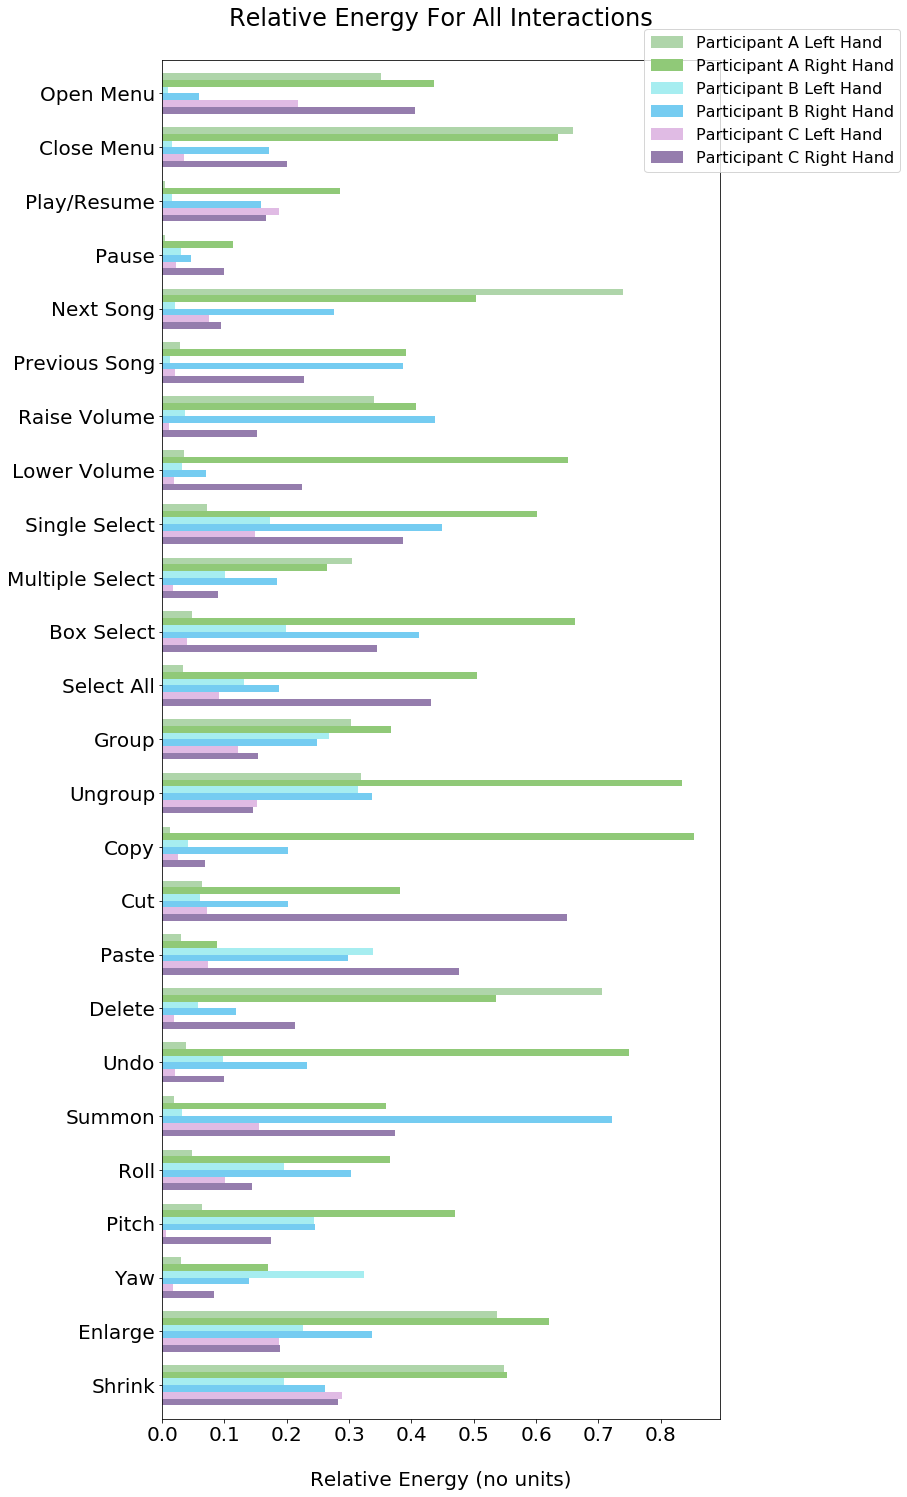

In [4]:
#print(barchart)
groups = barchart
group_labels = ["Open Menu","Close Menu","Play/Resume","Pause","Next Song","Previous Song","Raise Volume","Lower Volume","Single Select","Multiple Select","Box Select","Select All","Group","Ungroup","Copy","Cut","Paste","Delete","Undo","Summon","Roll","Pitch","Yaw","Enlarge","Shrink"]
legend_labels =["Participant A Left Hand","Participant A Right Hand","Participant B Left Hand","Participant B Right Hand","Participant C Left Hand","Participant C Right Hand"]
df = pd.DataFrame(groups, index=group_labels)
barcolors = ['#AFD5AA','#90C978','#A6EDF0','#75CCF1','#E0BBE4','#957DAD']
ax = df.plot(kind='barh',legend=True, width=0.75, figsize=(10,25),color=barcolors)
ax.set_xlabel('\nRelative Energy (no units)',size=20)
plt.title("Relative Energy For All Interactions\n",fontsize=24)
plt.gca().invert_yaxis()
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.legend(labels=legend_labels,loc='center left', bbox_to_anchor=(0.85, 0.97),fontsize=16)
plt.savefig('relativenergy.png',bbox_inches='tight')
plt.show()

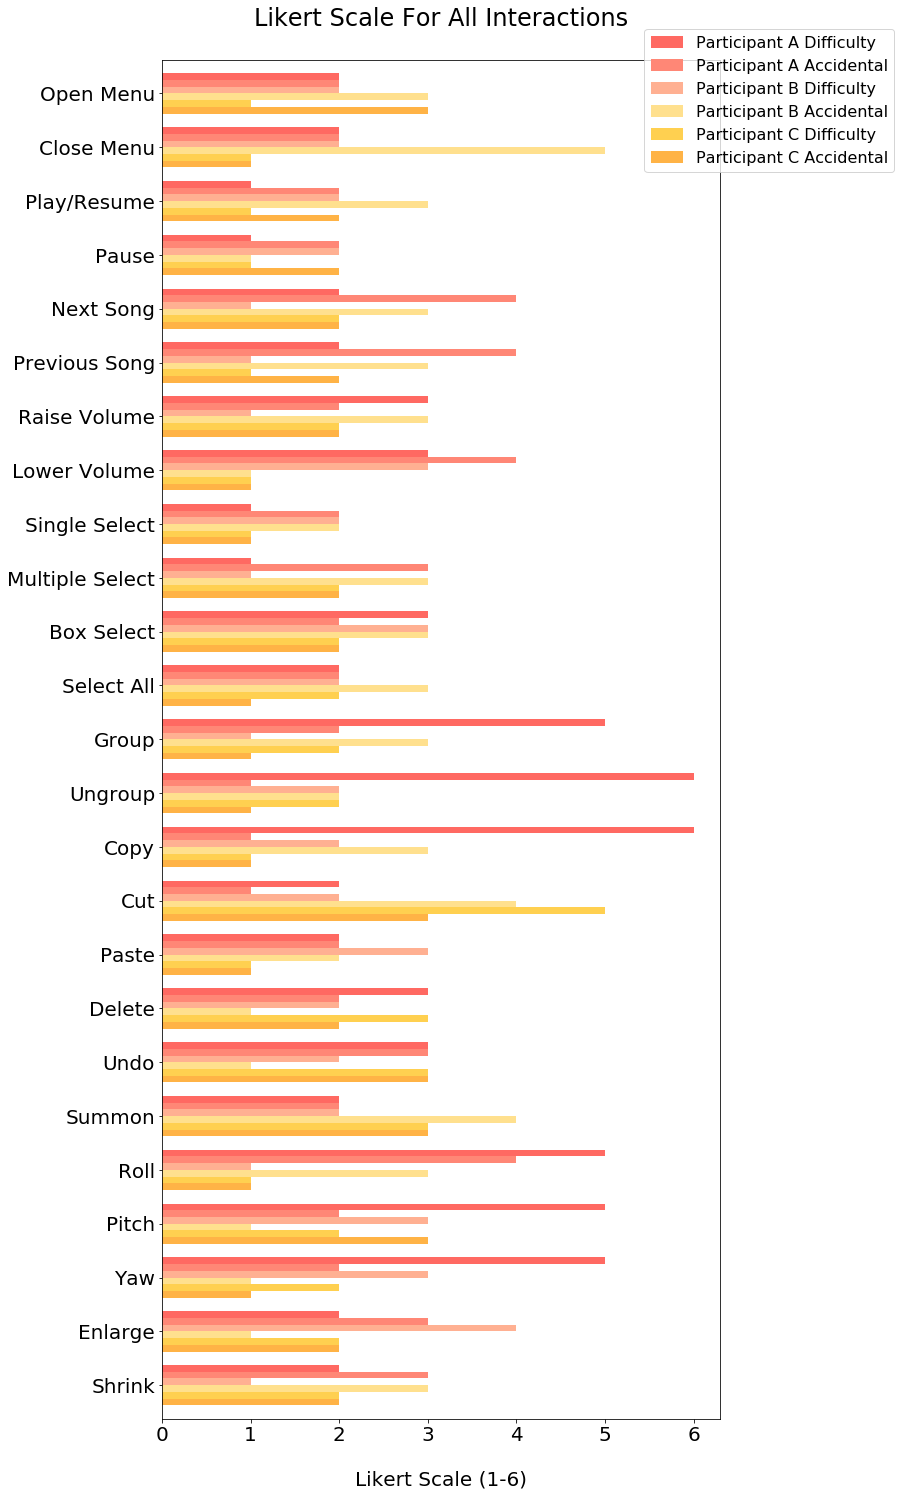

In [4]:
data2 = pd.read_csv("userstudyquestions.csv",",")
difficulty=data2[['Difficulty']].to_numpy()
accidental=data2[['Accidental']].to_numpy()
difficulty,accidental=np.concatenate(difficulty,axis=0),np.concatenate(accidental,axis=0)
combined=[]
for i in range(0,74):
    combined.append([difficulty[i],accidental[i]])
output=[]
for i in range(0,25):
    formatted=[]
    formatted.append(combined[i])
    formatted.append(combined[i+24])
    formatted.append(combined[i+49])
    output.append(formatted)
output=np.array(output)
output=output.flatten()
N=6
output = [output[n:n+N] for n in range(0, len(output), N)]
groups=output
group_labels = ["Open Menu","Close Menu","Play/Resume","Pause","Next Song","Previous Song","Raise Volume","Lower Volume","Single Select","Multiple Select","Box Select","Select All","Group","Ungroup","Copy","Cut","Paste","Delete","Undo","Summon","Roll","Pitch","Yaw","Enlarge","Shrink"]
legend_labels =["Participant A Difficulty","Participant A Accidental","Participant B Difficulty","Participant B Accidental","Participant C Difficulty","Participant C Accidental"]
df = pd.DataFrame(groups, index=group_labels)
barcolors = ['#FF6962','#FF8776','#FFB092','#FFE08E','#FFD050','#FFB346']
ax = df.plot(kind='barh',legend=True, width=0.75, figsize=(10,25),color=barcolors)
ax.set_xlabel('\nLikert Scale (1-6)',size=20)
plt.title("Likert Scale For All Interactions\n",fontsize=24)
plt.gca().invert_yaxis()
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.legend(labels=legend_labels,loc='center left', bbox_to_anchor=(0.85, 0.97),fontsize=16)
plt.savefig('likertscale.png',bbox_inches='tight')
plt.show()

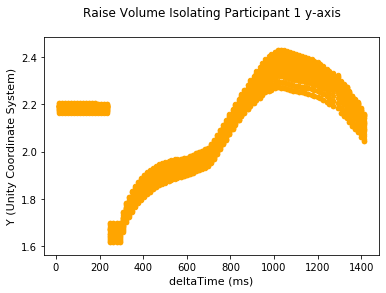

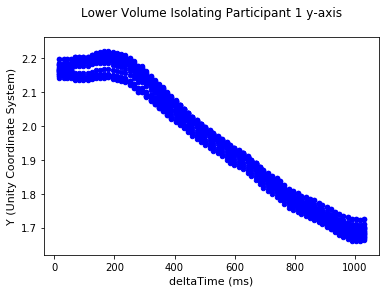

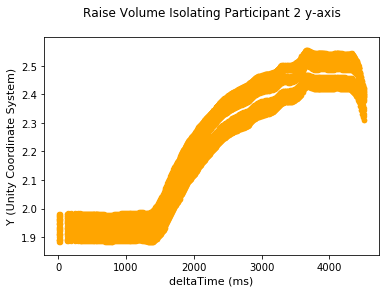

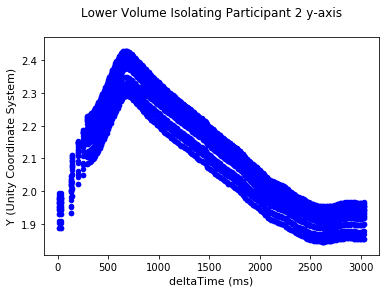

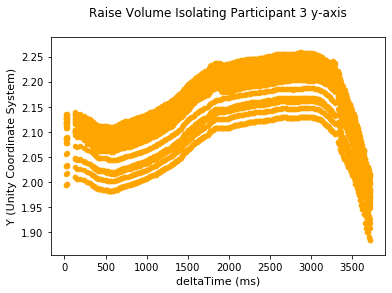

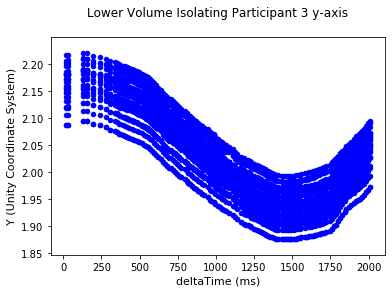

In [11]:
for i in range(1, participants+1):
    raisevolume = data[data['Interaction'] == 7]
    raisevolume = raisevolume[raisevolume['Participant'] == i]
    raisevolume = raisevolume[raisevolume['Hand'] == 'R']
    lowervolume = data[data['Interaction'] == 8]
    lowervolume = lowervolume[lowervolume['Participant'] == i]
    lowervolume = lowervolume[lowervolume['Hand'] == 'R']
    d = {'Y': raisevolume['Y'],'Time': raisevolume['Time']}
    d1 = {'Y': lowervolume['Y'],'Time': lowervolume['Time']}
    df = pd.DataFrame(data=d)
    df1 = pd.DataFrame(data=d1)
    ax = df.plot.scatter(x="Time",y="Y",color='orange')
    ax.set_xlabel('deltaTime (ms)',size=11)
    ax.set_ylabel('Y (Unity Coordinate System)',size=11)
    plt.title("Raise Volume Isolating Participant " + str(i) + " y-axis\n",fontsize=12)
    plt.savefig('participant'+str(i)+'raisevolume.png',bbox_inches='tight')
    ax1 = df1.plot.scatter(x="Time",y="Y",color='blue')
    ax1.set_xlabel('deltaTime (ms)',size=11)
    ax1.set_ylabel('Y (Unity Coordinate System)',size=11)
    plt.title("Lower Volume Isolating Participant " + str(i) + " y-axis\n",fontsize=12)
    plt.savefig('participant'+str(i)+'lowervolume.png',bbox_inches='tight')


In [141]:
import re

stop_words=['hand','motion','hands','in','it','on','if','to','ie','of','at','is','a','as','the','he','that','each'
           ,'with','and','them','use','through','though','made','used','same','for','but','him','so','you','can'
           ,'something','all','things','make','making','by','onto','then','like']

def preprocess(raw_text):
    letters_only_text = re.sub("[^a-zA-Z]", " ", raw_text)
    words = letters_only_text.lower().split()
    cleaned_words = []
    for word in words:
        if word not in stop_words:
            cleaned_words.append(word)
    return " ".join(cleaned_words)

data2['Thought Process'] = data2['Thought Process'].apply(preprocess)
data2['Video Notes'] = data2['Video Notes'].apply(preprocess)
pd.set_option("display.max_colwidth", -1)
data2

,Participant,Interaction,Difficulty,Accidental,Thought Process,Video Notes
0,1,1,2,2,pulling down projector screen board similar,both sliding down drawing blind
1,1,2,2,2,pushed away get rid,waved away right
2,1,3,1,2,go button pointed button pointing activated play,pointed play button right index finger
3,1,4,1,2,go button pointed button pointing activated pause,pointed play button right index finger
4,1,5,2,4,laptops phones swiping skipping swiping different song,pointed album covers index swiped left
...,...,...,...,...,...,...
70,3,21,2,3,flipping using axis one side object,left keep object place swiped left right spin axis
71,3,22,2,1,flipping using axis one side object,left keep object place flicked forwards right rotate
72,3,23,2,2,flipping using axis one side object,left keep object place swiped left right spin axis
73,3,24,2,2,pulling outwards stretching object,pinching both separated keeping pinched


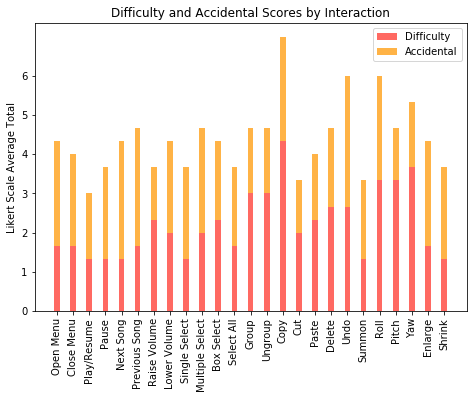

,Difficulty,Accidental
0,1.667,2.667
1,1.667,2.333
2,1.333,1.667
3,1.333,2.333
4,1.333,3.000
5,1.667,3.000
6,2.333,1.333
7,2.000,2.333
8,1.333,2.333
9,2.000,2.667


In [107]:
dataframe = data2.groupby(["Interaction"])
average_difficulty = []
average_accidental = []

for i in range(1,interactions+1):
        new = dataframe.get_group(i)
        average_difficulty.append(new.Difficulty.sum()/3)
        average_accidental.append(new.Accidental.sum()/3)

group_labels = ["Open Menu","Close Menu","Play/Resume","Pause","Next Song","Previous Song","Raise Volume","Lower Volume","Single Select","Multiple Select","Box Select","Select All","Group","Ungroup","Copy","Cut","Paste","Delete","Undo","Summon","Roll","Pitch","Yaw","Enlarge","Shrink"]
dataframe = pd.DataFrame()
dataframe['Difficulty']=pd.Series(average_difficulty)
dataframe['Accidental']=pd.Series(average_accidental)

N = 25
ind = np.arange(N)
width = 0.35
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(group_labels, dataframe['Difficulty'].to_list(), width, color='#FF6962')
ax.bar(ind, dataframe['Accidental'].to_list(), width,bottom=dataframe['Difficulty'].to_list(), color='#FFB346')
ax.set_ylabel('Likert Scale Average Total')
ax.set_title('Difficulty and Accidental Scores by Interaction')
ax.set_xticklabels(labels=group_labels,rotation=90)
ax.set_yticks(np.arange(0, 7, 1))
ax.legend(labels=['Difficulty', 'Accidental'])
plt.savefig('likerttotal.png',bbox_inches='tight')
plt.show()

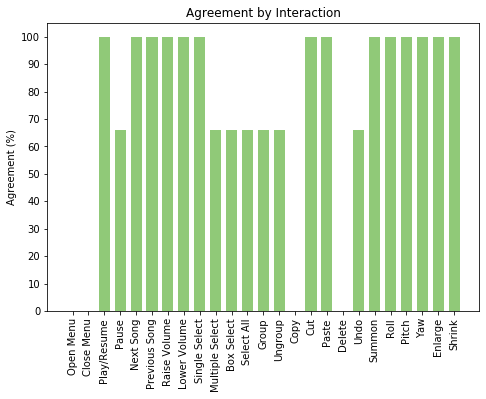

In [149]:
data = [0,0,100,66,100,100,100,100,100,66,66,66,66,66,0,100,100,0,66,100,100,100,100,100,100]

group_labels = ["Open Menu","Close Menu","Play/Resume","Pause","Next Song","Previous Song","Raise Volume","Lower Volume","Single Select","Multiple Select","Box Select","Select All","Group","Ungroup","Copy","Cut","Paste","Delete","Undo","Summon","Roll","Pitch","Yaw","Enlarge","Shrink"]
dataframe['Agreement']=pd.Series(data)

N = 25
ind = np.arange(N)
width = 0.7
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(group_labels, dataframe['Agreement'].to_list(), width, color='#90C978')
ax.set_ylabel('Agreement (%)')
ax.set_title('Agreement by Interaction')
ax.set_xticklabels(labels=group_labels,rotation=90)
ax.set_yticks(np.arange(0, 110, 10))
plt.savefig('agreement.png',bbox_inches='tight')
plt.show()

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
all_words=''
group_labels = ["Open Menu","Close Menu","Play","Pause","Next Song","Previous Song","Raise Volume","Lower Volume","Single Select","Multiple Select","Box Select","Select All","Group","Ungroup","Copy","Cut","Paste","Delete","Undo","Summon","Roll","Pitch","Yaw","Enlarge","Shrink"]
for i in range(1,26):
    all_words=''
    for arg in data2["Video Notes"][data2["Interaction"]==i]:
        tokens = arg.split()  
        all_words += " ".join(tokens)+" "
    for arg in data2["Video Notes"][data2["Interaction"]==i]:
        tokens = arg.split()  
        all_words += " ".join(tokens)+" "
    wordcloud = WordCloud(width = 700, height = 700, 
                    background_color ='white', 
                    min_font_size = 10).generate(all_words)                    
    plt.figure(figsize = (5, 5), facecolor = None)
    plt.title(group_labels[i-1],size=20)
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.savefig(str(group_labels[i-1])+".png",bbox_inches='tight')
    plt.show()

ModuleNotFoundError: No module named 'wordcloud'